## Observations and Insights 

In [1]:
#Notable observations
#Using Capomulin, tumor volumn is higher in heavier mice.
#Based on Tumor volume, Capomulin and Ramicane seems to be the best for lowering tumor volume.
#Capomulin works best in the first 5 seconds then tumor volume increases over time


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from functools import reduce
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_data = mouse_metadata.merge(study_results, on = "Mouse ID")
# Combine the data into a single dataset

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID","Timepoint"],keep = False) == True]
dupes_df= dupes_df["Mouse ID"].drop_duplicates()
dupes_df = pd.DataFrame(dupes_df)
dupes_df

,Mouse ID
908,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df_keep = pd.DataFrame(dupes_df)
duplicated = dupes_df_keep.merge(merged_data, on = "Mouse ID")
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.copy()
cleaned_data = cleaned_data.loc[~(cleaned_data["Mouse ID"].isin(dupes_df["Mouse ID"]))]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_no_dupes = cleaned_data["Mouse ID"].nunique()
mice_count_no_dupes

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = round(cleaned_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],3)
mean = mean.reset_index()
mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean"})

median = round(cleaned_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],3)
median = median.reset_index()
median = median.rename(columns={"Tumor Volume (mm3)":"Median"})

var = round(cleaned_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],3)
var = var.reset_index()
var = var.rename(columns={"Tumor Volume (mm3)":"Variance"})

std = round(cleaned_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],3)
std = std.reset_index()
std = std.rename(columns={"Tumor Volume (mm3)":"STD"})

sem = round(cleaned_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],3)
sem = sem.reset_index()
sem = sem.rename(columns={"Tumor Volume (mm3)":"SEM"})


dataframe = [mean,median,var,std,sem]

summary_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'], how='inner'), dataframe)
summary_df



,Drug Regimen,Mean,Median,Variance,STD,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
cleaned_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

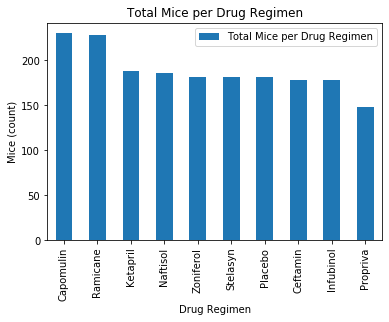

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
mouseplt =cleaned_data["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="Total Mice per Drug Regimen")
plt.legend()
plt.show()

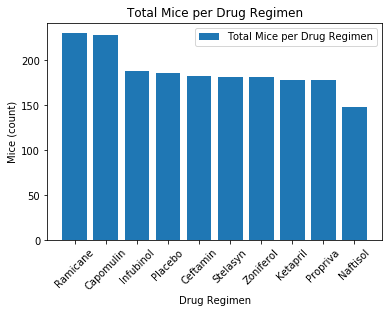

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
myplt = cleaned_data["Drug Regimen"].unique()
myplt
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice (count)")
plt.bar(myplt, height=(mouseplt), label="Total Mice per Drug Regimen")
plt.xticks(rotation=45)
plt.legend()
plt.show()


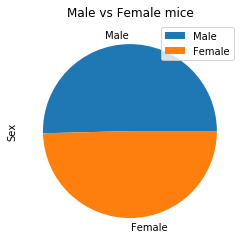

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = cleaned_data.drop_duplicates(subset=["Mouse ID"])
male_vs_female = male_vs_female["Sex"].value_counts()
plt.title("Male vs Female mice")
male_vs_female.plot.pie()
plt.legend()
plt.show()

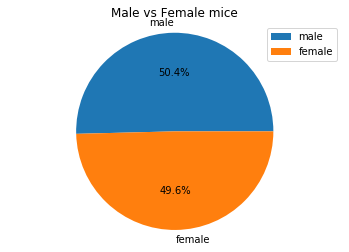

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'male','female'
sizes = male_vs_female

fig1, ax1 = plt.subplots()
plt.title("Male vs Female mice")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cleaned_data.sort_values(by='Timepoint', ascending=False)
sorted_df = sorted_df.drop_duplicates(subset=["Mouse ID"])
druglist = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = sorted_df.loc[(sorted_df["Drug Regimen"].isin(druglist))]
sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted_df["Drug Regimen"].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for i, treatment in enumerate(treatments):
    filtered_df = sorted_df.loc[(sorted_df["Drug Regimen"] == treatment)]
    tumor_vol.append(filtered_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']])
    Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - (1.5 * IQR),4)
    upper_bound = round(Q3 + (1.5 * IQR),4)
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")



Values below 20.7046 and above 51.832 would be considered outliers
Values below 25.3554 and above 87.6665 would be considered outliers
Values below 17.9127 and above 54.3068 would be considered outliers
Values below 36.8329 and above 82.7414 would be considered outliers


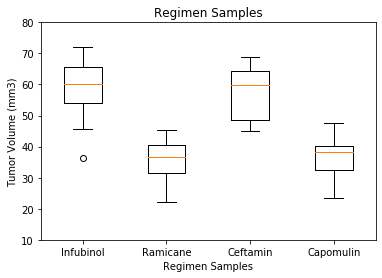

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Values per regimen
values_per_reg = pd.DataFrame(tumor_vol[0])
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[1]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[2]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[3]))

#Get a dataframe with only tumor volumne and drug regimen
drug_vs_tvol = values_per_reg.reset_index() 
drug_vs_tvol = values_per_reg[["Drug Regimen","Tumor Volume (mm3)"]] 


#Seperate drugs by regimen into series
inf_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Infubinol"]
inf_drug = inf_drug.reset_index()
inf_drug_series = inf_drug["Tumor Volume (mm3)"]
inf_drug_series = pd.Series(inf_drug_series)

rami_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ramicane"]
rami_drug = rami_drug.reset_index()
rami_drug_series = rami_drug["Tumor Volume (mm3)"]
rami_drug_series = pd.Series(rami_drug_series)

ceft_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ceftamin"]
ceft_drug = ceft_drug.reset_index()
ceft_drug_series = ceft_drug["Tumor Volume (mm3)"]
ceft_drug_series = pd.Series(ceft_drug_series)

capo_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Capomulin"]
capo_drug = capo_drug.reset_index()
capo_drug_series = capo_drug["Tumor Volume (mm3)"]
capo_drug_series = pd.Series(capo_drug_series)

#plot all series on same plot
data = [inf_drug_series,rami_drug_series,ceft_drug_series,capo_drug_series]
fig7, ax7 = plt.subplots()
ax7.set_title('Regimen Samples')
plt.xlabel("Regimen Samples")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10,80)
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', 'Ceftamin','Capomulin'])
plt.show()

## Line and Scatter Plots

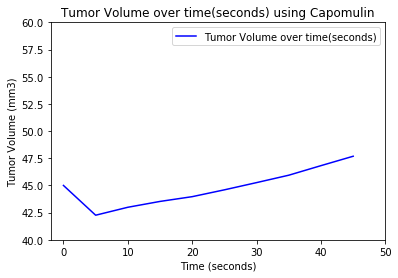

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capmice = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
capmouse = cleaned_data.loc[cleaned_data["Mouse ID"] == "i557"] 
plt.title("Tumor Volume over time(seconds) using Capomulin")
plt.xlabel("Time (seconds)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(40,60)
plt.xlim(-2,50)
plt.plot(capmouse["Timepoint"], capmouse["Tumor Volume (mm3)"] ,color="blue", label="Tumor Volume over time(seconds)" )
plt.legend()
plt.show()


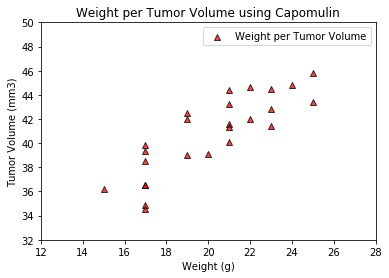

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_vol = capmice.groupby("Mouse ID").mean()

x_axis = average_tumor_vol["Weight (g)"]
y_axis = average_tumor_vol["Tumor Volume (mm3)"]

plt.title("Weight per Tumor Volume using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(32,50)
plt.xlim(12,28)

plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Weight per Tumor Volume")
plt.legend()
plt.plot()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(x_axis, y_axis)
rounded_corr = round(correlation[0],4)
rounded_corr

0.8419

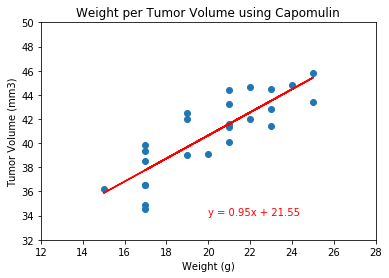

In [19]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Weight per Tumor Volume using Capomulin")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(32,50)
plt.xlim(12,28)
plt.show()